#Bike Sharing Multi Linear Regression

##Step 1: Reading and understanding the data

In [50]:
# Importing all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset

df = pd.read_csv("day.csv")

In [3]:
# Checking out the columns, its datatype and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Checking the shape of the data

df.shape

(730, 16)

In [5]:
# Statistical summary of numerical columns

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##Step 2: Data Preparation

- Dropping unwanted columns
 - Dropping instant column as it is index
 - As we are not doing daily analysis, we can drop dteday column(month & year present seperately)
 - Drop casual and registered column as cnt column capture the total count of both user type

In [6]:
df.drop(columns=["instant", "dteday", "casual", "registered"], inplace=True)

- Convert the numerical values in the following categorial columns to string
 - mnth
 - weekday
 - season
 - weathersit

 Not converting yr, holiday and workingday as these can be treated as binary values

In [7]:
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})

In [8]:
# Preview dataframe

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


##Step 3: Data Visualisation/EDA

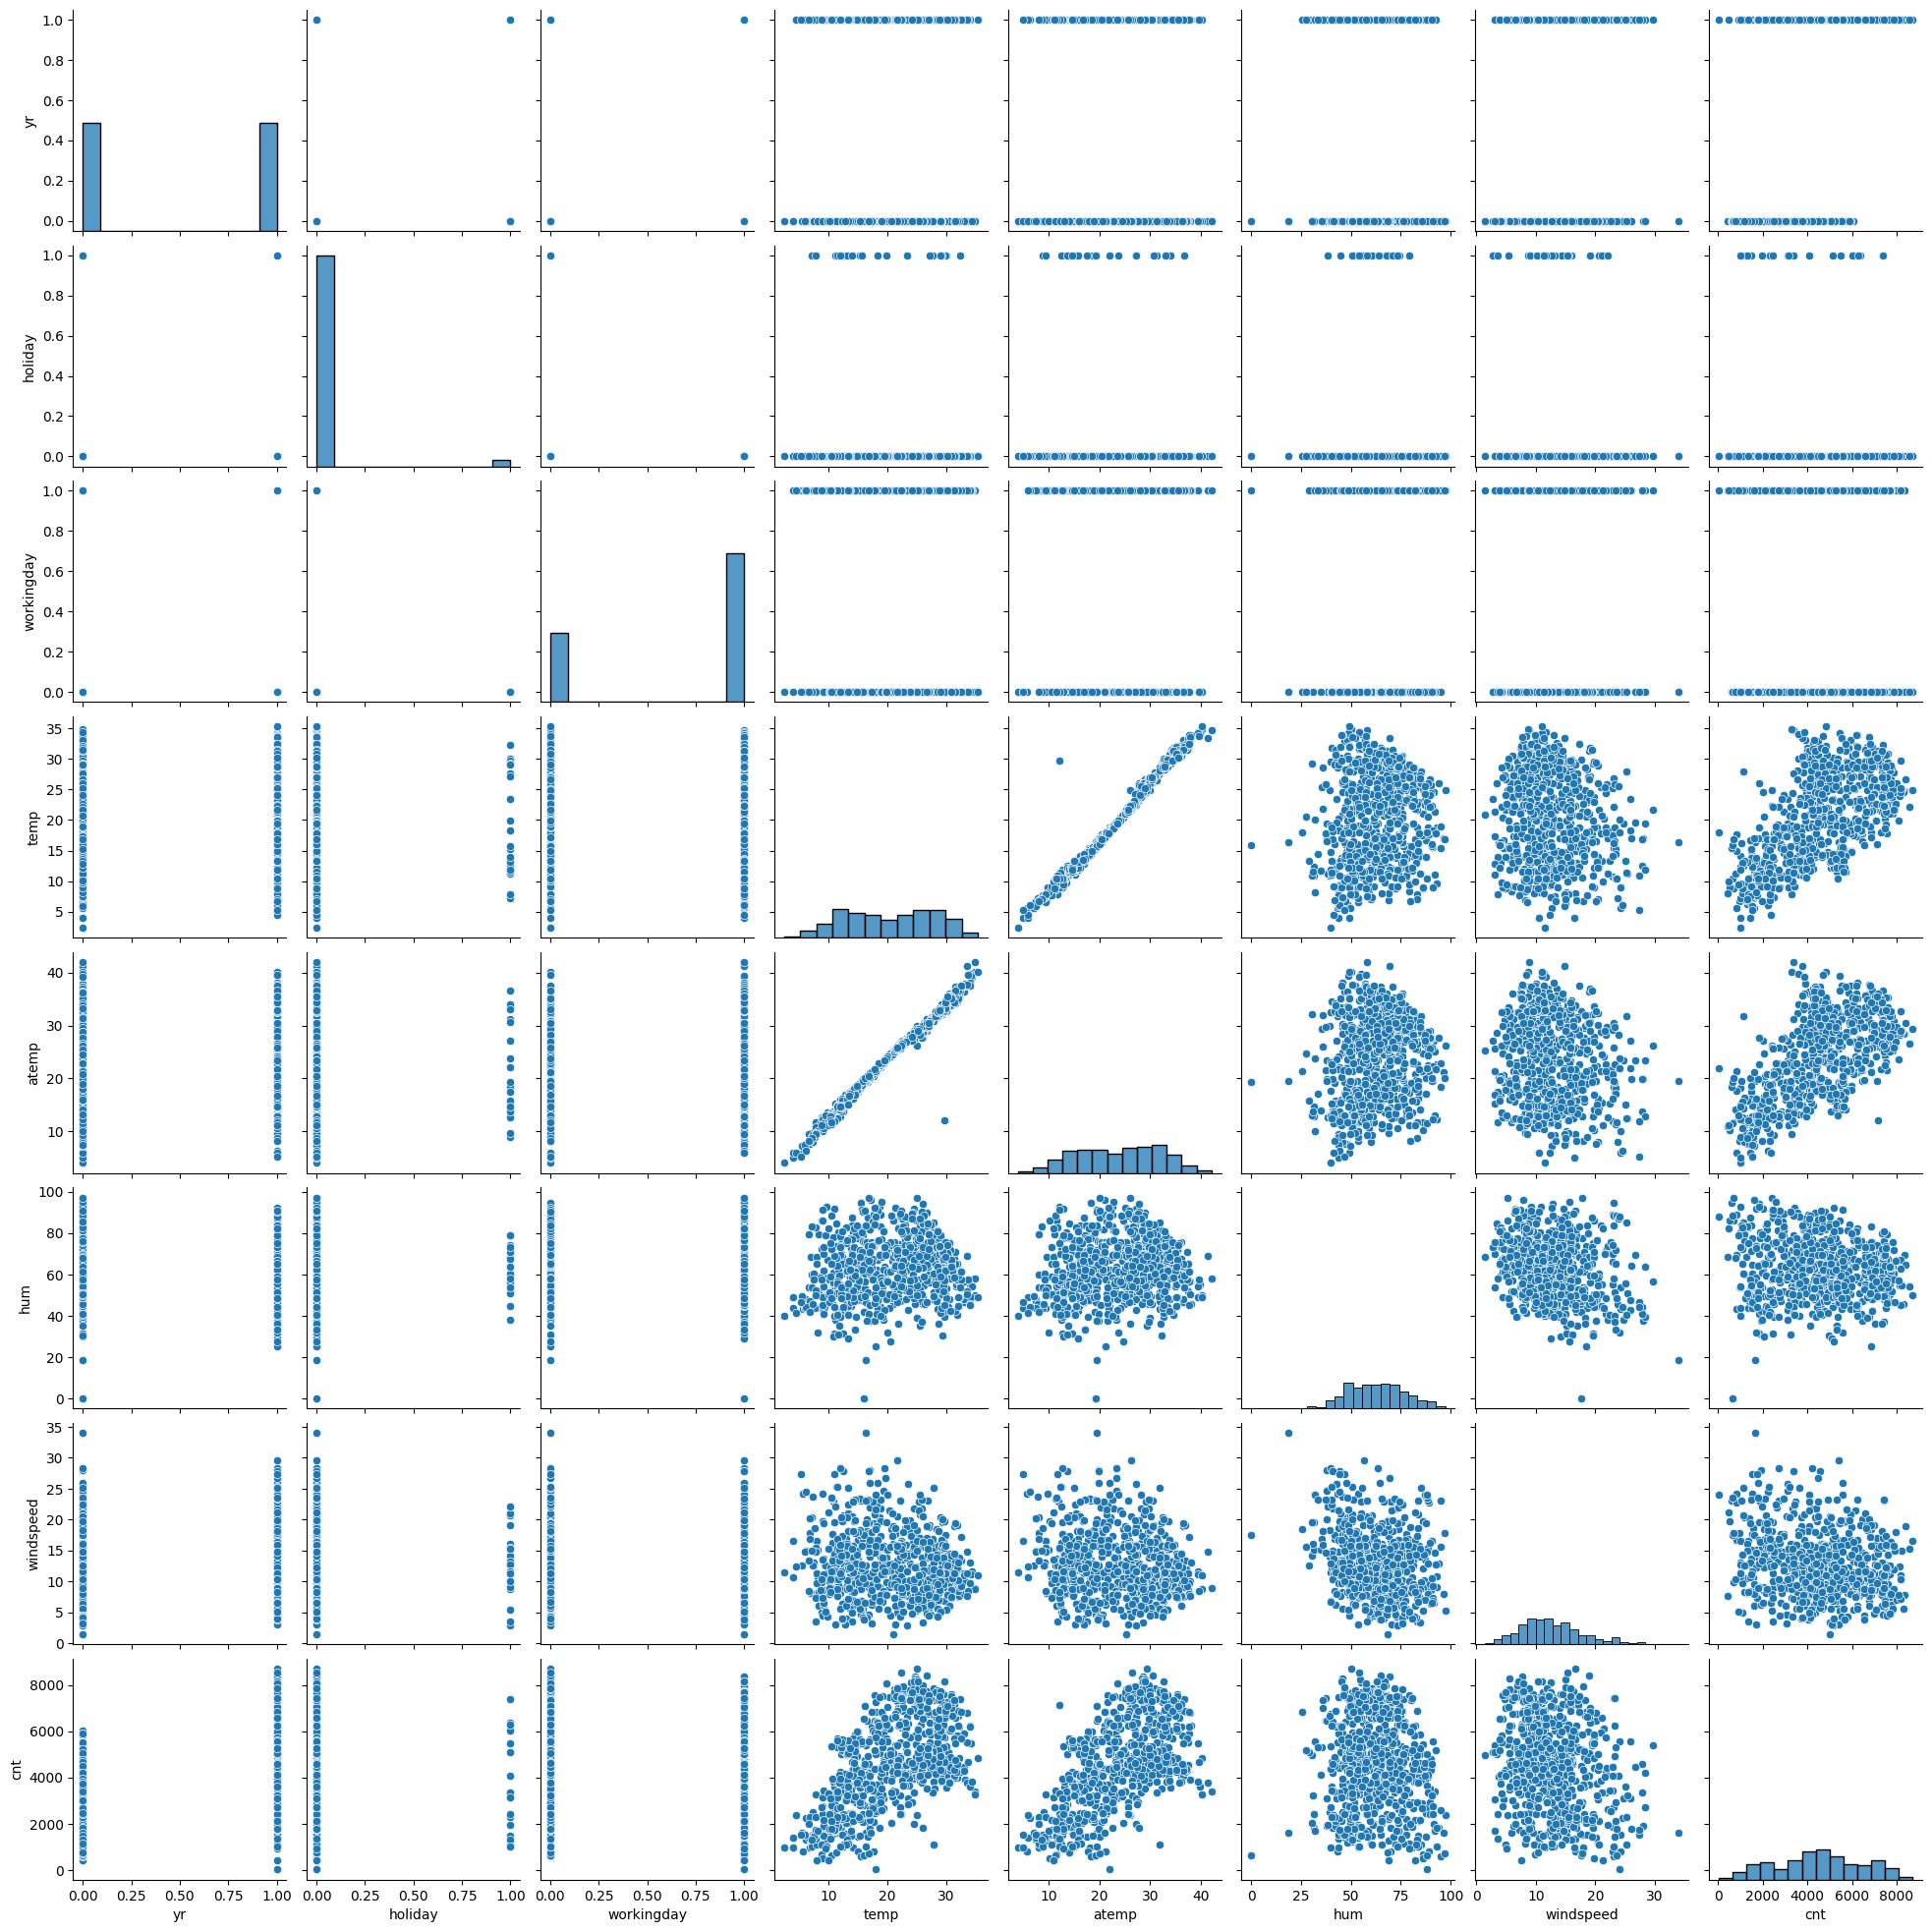

In [9]:
# Visualising Numeric Variables

sns.pairplot(df)
plt.show()

Observation based on numerical pair plot:
- Based on above plot, its clear that atemp and temp are highly corelated
- This is a clear case of multicolinearity
- temp and atemp has correlation with the target variable cnt too
- Though not an ideal bell curve, the data is normally distributed

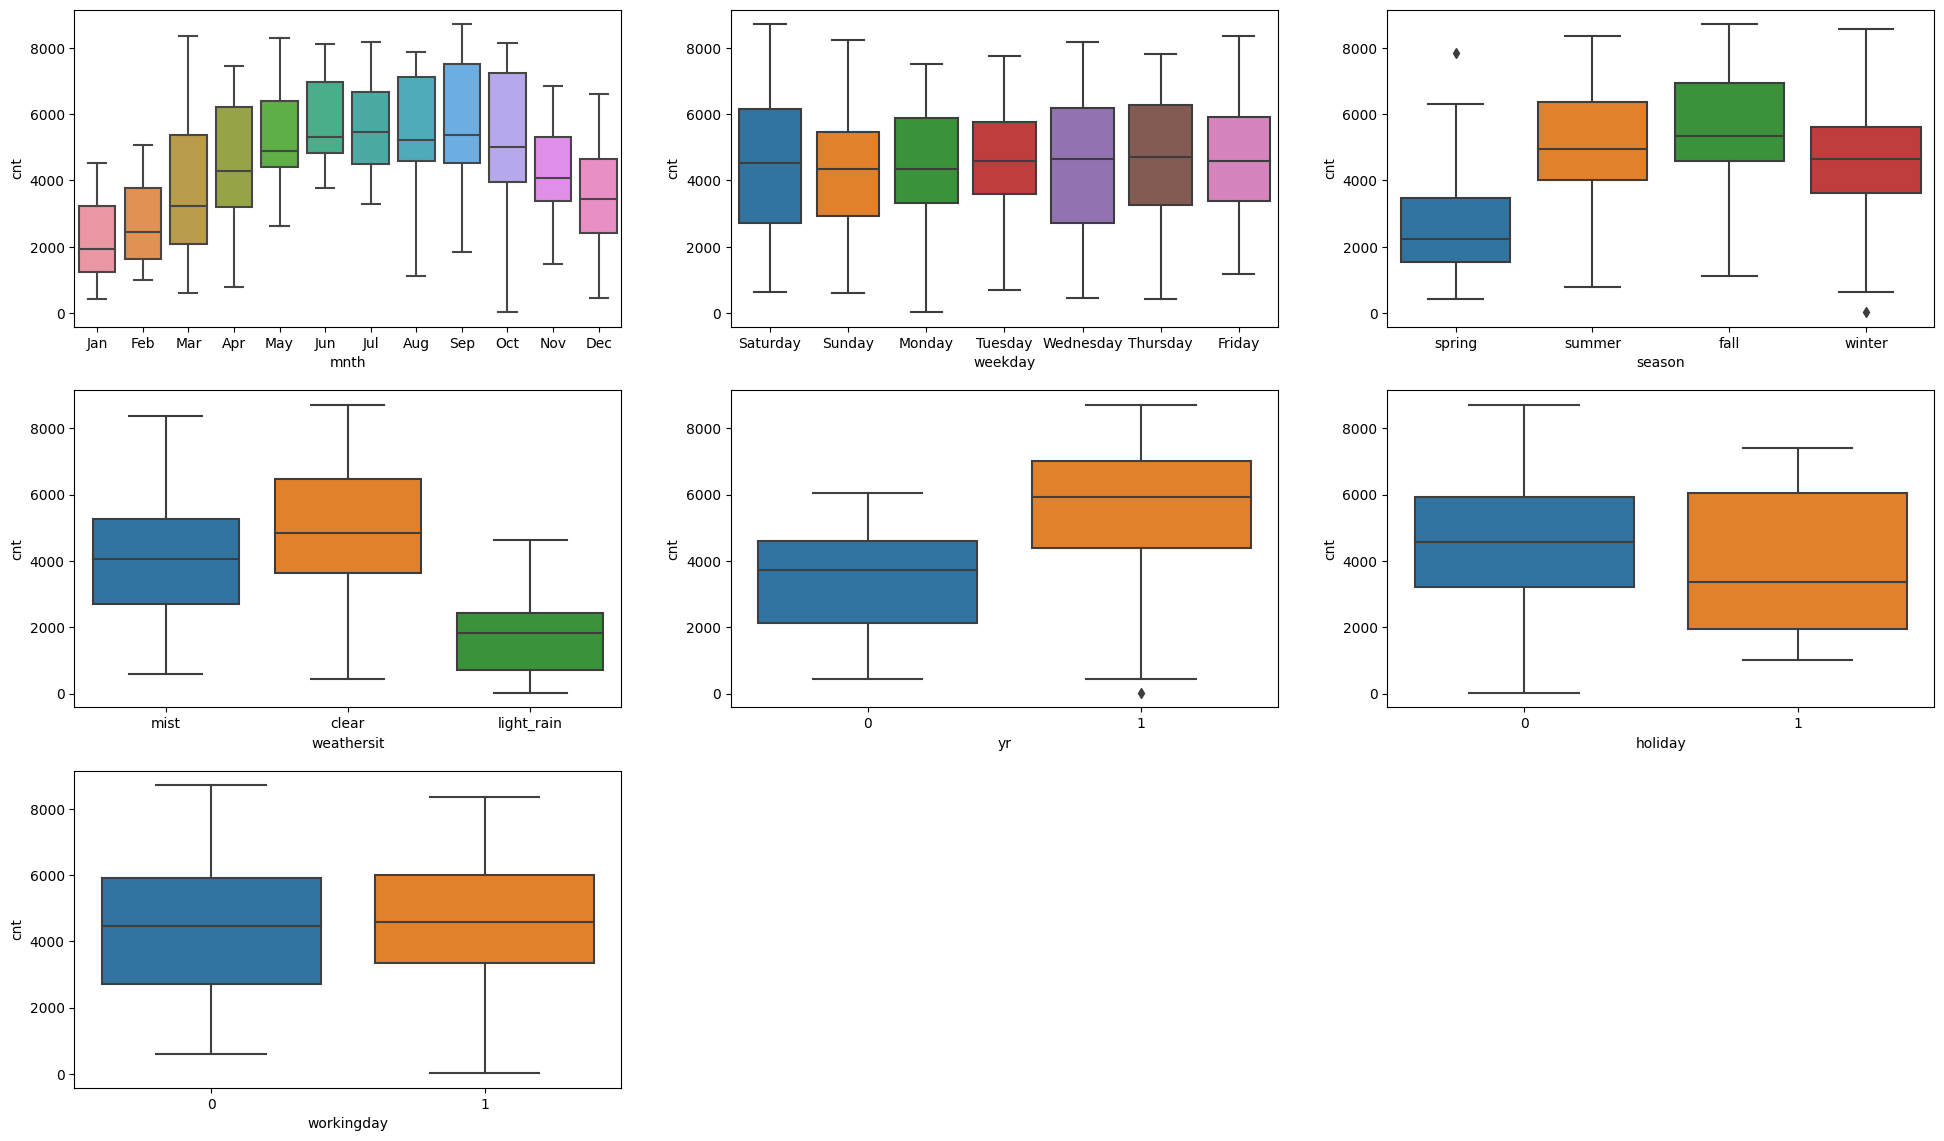

In [10]:
# Visualising Categorical Variables


plt.figure(figsize=(24, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

Observation based on categorical columns box plot:
- The demand is high between June to October
- Demand is more during fall season
- Clear weather also has shown increase in demand
- More demand on working day
- More demand when its not a holiday

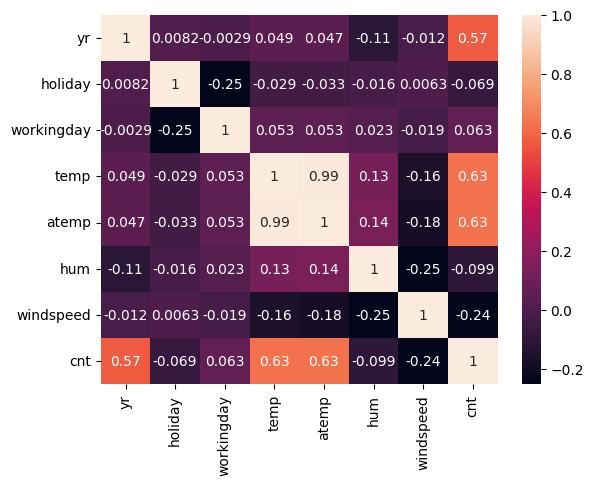

In [11]:
# Heatmap for correlation

corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

Correlation heatmap findings:
- Hardly any negative correlation is observed
- atemp and temp have too high correlation

## Step 4: Feature Engineering

Creating dummy variables for columns :
- mnth
- weekday
- season
- weathersit

In [12]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth'

mnth = pd.get_dummies(df['mnth'])
mnth.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# We can drop any one column from this and still it can convey the required information

mnth = pd.get_dummies(df['mnth'], drop_first = True)

# Add the results to the original dataframe

df = pd.concat([df, mnth], axis = 1)

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Saturday,0,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# Doing the same for other 3 categorical columns

# column weekday
weekday = pd.get_dummies(df['weekday'], drop_first = True)
df = pd.concat([df, weekday], axis = 1)

# column season
season = pd.get_dummies(df['season'], drop_first = True)
df = pd.concat([df, season], axis = 1)

# column weathersit
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
df = pd.concat([df, weathersit], axis = 1)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,light_rain,mist
0,spring,0,Jan,0,Saturday,0,mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,Sunday,0,mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


In [17]:
# Drop the columns for which dummies were created

df.drop(["mnth", "weekday", "season", "weathersit"], axis = 1, inplace = True)

In [18]:
df.shape

(730, 30)

## Step 5: Splitting data into test and train

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the Features

In [20]:
scaler = MinMaxScaler()
num_vars = ['hum', 'temp', 'atemp', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [21]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,light_rain,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,0,1


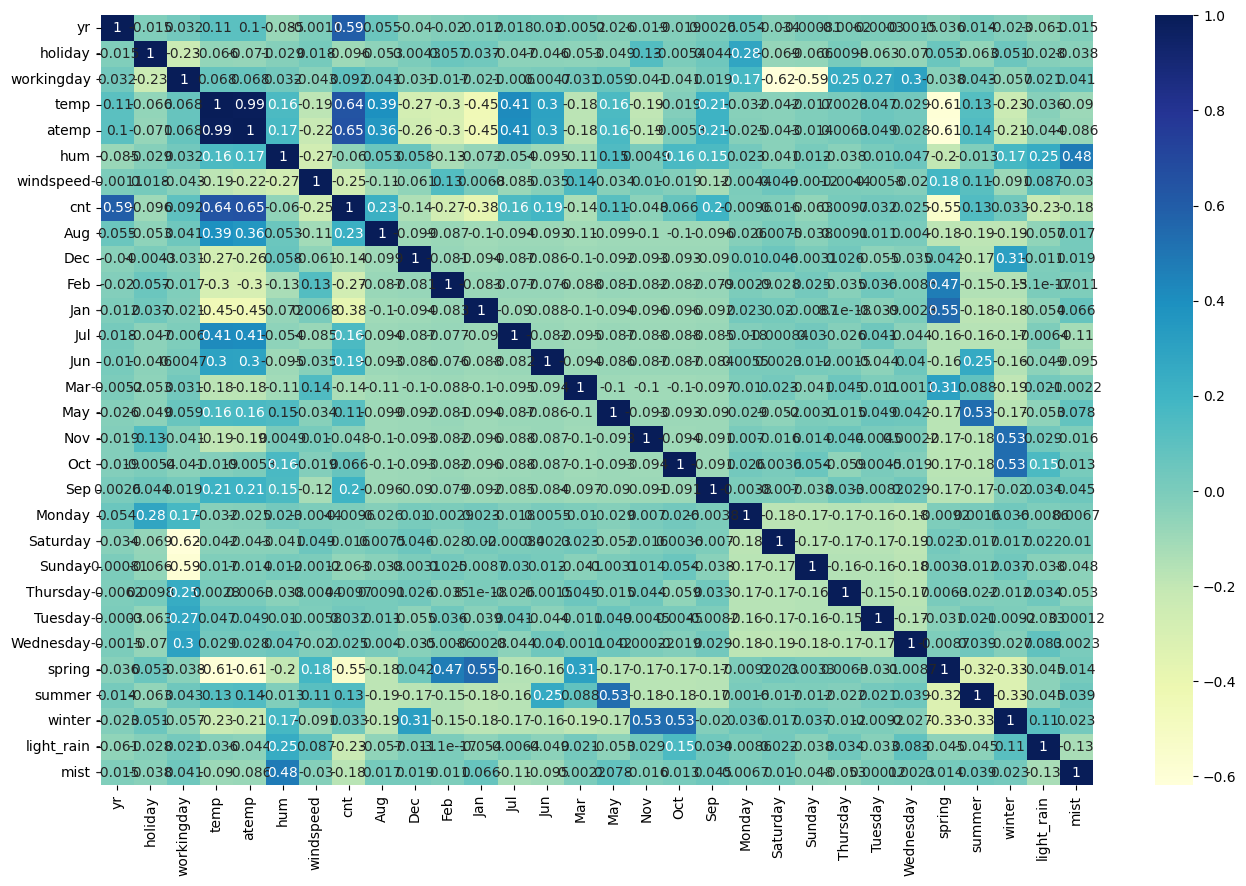

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp/atemp seems to the correlated to cnt the most. Let's see a pairplot for temp vs price.

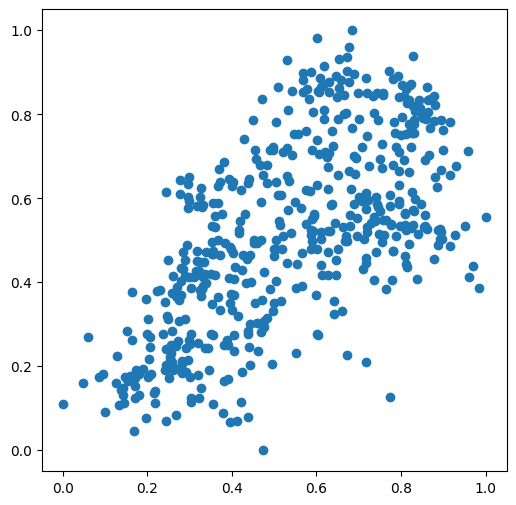

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick temp as the first variable and we'll try to fit a regression line to that.

## Step 6: Build linear model - Using Stats Model

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
import statsmodels.api as sm

# Adding intercept
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [28]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

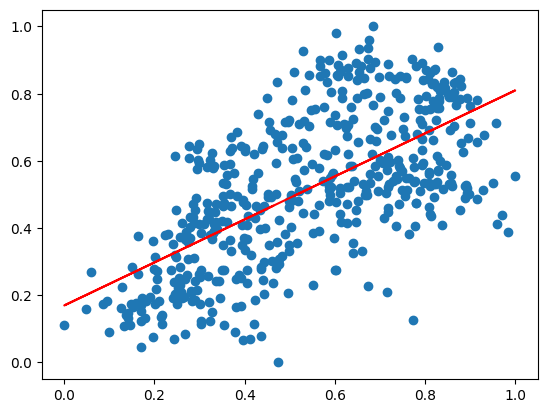

In [29]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           5.80e-61
Time:                        14:12:39   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value of 0.414 is pretty good for just 1 variable, we can now add more variables and improvce this value further

Adding all the variables to the model

In [31]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'spring', 'summer', 'winter', 'light_rain', 'mist'],
      dtype='object')

In [32]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.245237
yr            0.232208
holiday       0.010689
workingday    0.096962
temp          0.401322
atemp         0.050628
hum          -0.151812
windspeed    -0.184388
Aug           0.016076
Dec          -0.045572
Feb          -0.032176
Jan          -0.062565
Jul          -0.039277
Jun          -0.001704
Mar           0.001288
May           0.024691
Nov          -0.041783
Oct           0.007695
Sep           0.081806
Monday       -0.021502
Saturday      0.096059
Sunday        0.041527
Thursday     -0.009750
Tuesday      -0.019308
Wednesday    -0.005733
spring       -0.048580
summer        0.038216
winter        0.105387
light_rain   -0.256697
mist         -0.061030
dtype: float64

In [33]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          8.42e-181
Time:                        14:17:13   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.035      6.953      0.000       0.176       0.315
yr             0.2322      0.008     28.792      0.000       0.216       0.248
holiday        0.0107      0.024      0.443      0.658      -0.037       0.058
workingday     0.0970      0.012      7.903      0.000       0.073       0.121
temp           0.4013      0.142      2.821      0.005       0.122       0.681
atemp          0.0506      0.138      0.366      0.714      -0.221       0.322
hum           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
Aug            0.0161      0.034      0.473      0.637      -0.051       0.083
Dec           -0.0456      0.034     -1.356      0.176      -0.112       0.020
Feb           -0.0322      0.033     -0.978      0.329      -0.097       0.032
Jan           -0.0626      0.034     -1.864      0.063      -0.129       0.003
Jul           -0.0393      0.035     -1.116      0.265      -0.108       0.030
Jun           -0.0017      0.025     -0.067      0.946      -0.051       0.048
Mar            0.0013      0.025      0.052      0.958      -0.047       0.050
May            0.0247      0.021      1.169      0.243      -0.017       0.066
Nov           -0.0418      0.036     -1.149      0.251      -0.113       0.030
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0818      0.032      2.549      0.011       0.019       0.145
Monday        -0.0215      0.015     -1.395      0.164      -0.052       0.009
Saturday       0.0961      0.014      6.984      0.000       0.069       0.123
Sunday         0.0415      0.014      2.974      0.003       0.014       0.069
Thursday      -0.0097      0.016     -0.625      0.532      -0.040       0.021
Tuesday       -0.0193      0.016     -1.242      0.215      -0.050       0.011
Wednesday     -0.0057      0.015     -0.384      0.701      -0.035       0.024
spring        -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer         0.0382      0.026      1.455      0.146      -0.013       0.090
winter         0.1054      0.028      3.770      0.000       0.050       0.160
light_rain    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
mist          -0.0610      0.010     -5.845      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     7.29e+15
==============================================================================

N

Some variables does seems statistically insignificant based on its p-value, Lets use VIF to exactly identify them

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
19,Saturday,19.72
20,Sunday,18.35
24,spring,10.80
26,winter,9.52
25,summer,8.31
15,Nov,6.80
16,Oct,6.59


Dropping column with highest VIF value

In [35]:
X_train = X_train.drop('workingday', 1,)

# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,435.42
3,atemp,383.92
4,hum,38.23
23,spring,11.83
25,winter,11.79
24,summer,6.91
15,Oct,6.40
14,Nov,6.12
6,Aug,6.02
5,windspeed,5.38


Dropping column with highest VIF value again

In [36]:
X_train = X_train.drop('temp', 1,)

# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.67
2,atemp,32.72
22,spring,11.82
24,winter,11.78
23,summer,6.91
14,Oct,6.38
13,Nov,6.12
5,Aug,5.41
8,Jan,5.21
4,windspeed,4.95


Dropping column with highest VIF value again

In [39]:
X_train = X_train.drop('hum', 1,)

# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,24.44
23,winter,11.58
21,spring,11.33
13,Oct,5.91
22,summer,5.87
12,Nov,5.56
4,Aug,5.09
3,windspeed,4.85
8,Jul,4.78
7,Jan,4.61


In [40]:
# Build a second fitted linear model

X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sat, 17 Jun 2023   Prob (F-statistic):          3.98e-178
Time:                        15:01:25   Log-Likelihood:                 516.48
No. Observations:                 510   AIC:                            -979.0
Df Residuals:                     483   BIC:                            -864.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3057      0.042      7.347      0.000       0.224       0.387
yr             0.2377      0.008     29.171      0.000       0.222       0.254
holiday       -0.0790      0.027     -2.912      0.004      -0.132      -0.026
atemp          0.3736      0.044      8.438      0.000       0.287       0.461
windspeed     -0.1443      0.025     -5.674      0.000      -0.194      -0.094
Aug            0.0315      0.034      0.931      0.352      -0.035       0.098
Dec           -0.0747      0.034     -2.216      0.027      -0.141      -0.008
Feb           -0.0525      0.033     -1.575      0.116      -0.118       0.013
Jan           -0.0908      0.034     -2.693      0.007      -0.157      -0.025
Jul           -0.0185      0.035     -0.525      0.600      -0.088       0.051
Jun            0.0229      0.025      0.924      0.356      -0.026       0.072
Mar           -0.0080      0.025     -0.322      0.748      -0.057       0.041
May            0.0282      0.021      1.338      0.182      -0.013       0.070
Nov           -0.0634      0.037     -1.721      0.086      -0.136       0.009
Oct           -0.0086      0.036     -0.238      0.812      -0.080       0.063
Sep            0.0790      0.032      2.439      0.015       0.015       0.143
Monday        -0.0296      0.016     -1.897      0.058      -0.060       0.001
Saturday      -0.0044      0.015     -0.287      0.774      -0.034       0.026
Sunday        -0.0635      0.016     -4.088      0.000      -0.094      -0.033
Thursday      -0.0134      0.016     -0.843      0.400      -0.045       0.018
Tuesday       -0.0244      0.016     -1.544      0.123      -0.056       0.007
Wednesday     -0.0103      0.015     -0.675      0.500      -0.040       0.020
spring        -0.0588      0.031     -1.925      0.055      -0.119       0.001
summer         0.0229      0.027      0.860      0.390      -0.029       0.075
winter         0.0965      0.028      3.393      0.001       0.041       0.152
light_rain    -0.2947      0.025    -11.932      0.000      -0.343      -0.246
mist          -0.0852      0.009     -9.755      0.000      -0.102      -0.068
==============================================================================
Omnibus:                       89.273   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.380
Skew:                          -0.822   Prob(JB):                     3.20e-59
Kurtosis:                       6.158   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Better p values after removing irrelevant features and R-squared was not much affected

##Step 7: Residual Analysis - Stats Model

Text(0.5, 0, 'Errors')

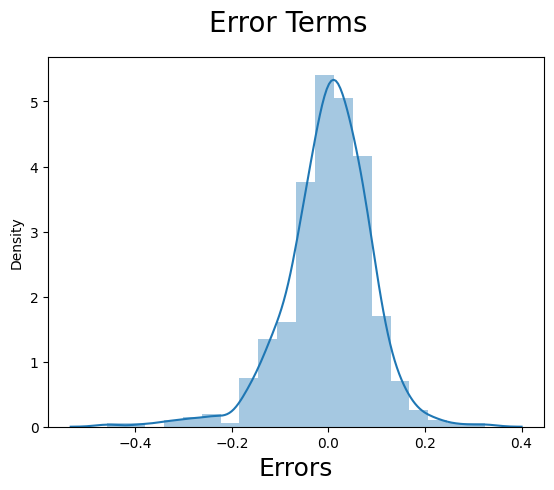

In [42]:
y_train_price = lr_2.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

The mean of the residuals is close to 0 and also the residual plot is a normal distribution, so we are good

##Step 8: Make Prediction - Stats Model

In [43]:
#Scaling test dataframe using the scaler object used to fit transform training dataset

num_vars = ['hum', 'temp', 'atemp', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [44]:
y_test = df_test.pop('cnt')
X_test = df_test

In [45]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'spring', 'summer', 'winter', 'light_rain', 'mist'],
      dtype='object')

In [46]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)
X_test_m2 = X_test_m2.drop(["workingday", "temp", "hum"], axis = 1)
# Making predictions
y_pred_m2 = lr_2.predict(X_test_m2)

##Step 9: Model Evaluation - Stats Model

Text(0, 0.5, 'y_pred')

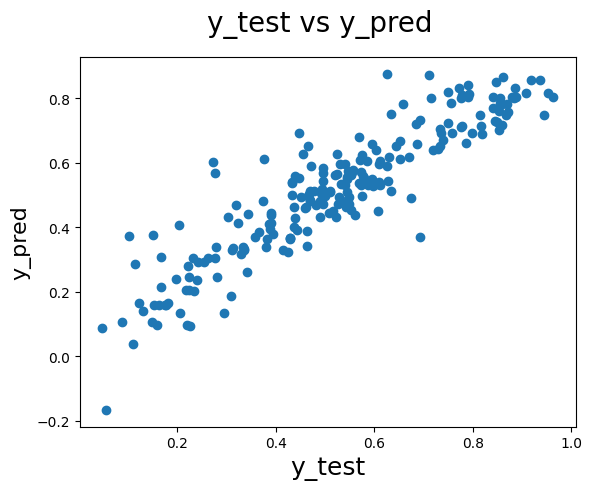

In [48]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [49]:
lr_2.params

const         0.305698
yr            0.237669
holiday      -0.079000
atemp         0.373647
windspeed    -0.144291
Aug           0.031531
Dec          -0.074687
Feb          -0.052460
Jan          -0.090785
Jul          -0.018496
Jun           0.022949
Mar          -0.008039
May           0.028199
Nov          -0.063389
Oct          -0.008650
Sep           0.079009
Monday       -0.029600
Saturday     -0.004381
Sunday       -0.063476
Thursday     -0.013373
Tuesday      -0.024430
Wednesday    -0.010261
spring       -0.058790
summer        0.022872
winter        0.096523
light_rain   -0.294714
mist         -0.085176
dtype: float64

In [52]:
#R-squared value on test data

r2_score(y_test, y_pred_m2)

0.8236912294479519

##Step 10: Build linear model - Using RFE and sklearn Linear Regression

In [62]:
# Running RFE with the output number of the variable equal to 15
# We are not considering the 3 columns which had high VIF here
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 2),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 12),
 ('Sunday', True, 1),
 ('Thursday', False, 10),
 ('Tuesday', False, 6),
 ('Wednesday', False, 11),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'windspeed', 'Dec', 'Feb', 'Jan', 'May',
       'Nov', 'Sep', 'Sunday', 'spring', 'winter', 'light_rain', 'mist'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Jul', 'Jun', 'Mar', 'Oct', 'Monday', 'Saturday', 'Thursday',
       'Tuesday', 'Wednesday', 'summer'],
      dtype='object')

In [66]:
#We can follow rest steps similarly on the rfe supported columns - Step 6, 7, 8, 9
#Not going into the details of the same

#We can conclude the analysis and the R-squared value we achieved is 0.82


In [67]:
#Completed